In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [120]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')

## DATA ANALYSIS

In [121]:
df_train

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [123]:
df_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>],
       [<Axes: title={'center': 'Viscera Weight'}>,
        <Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

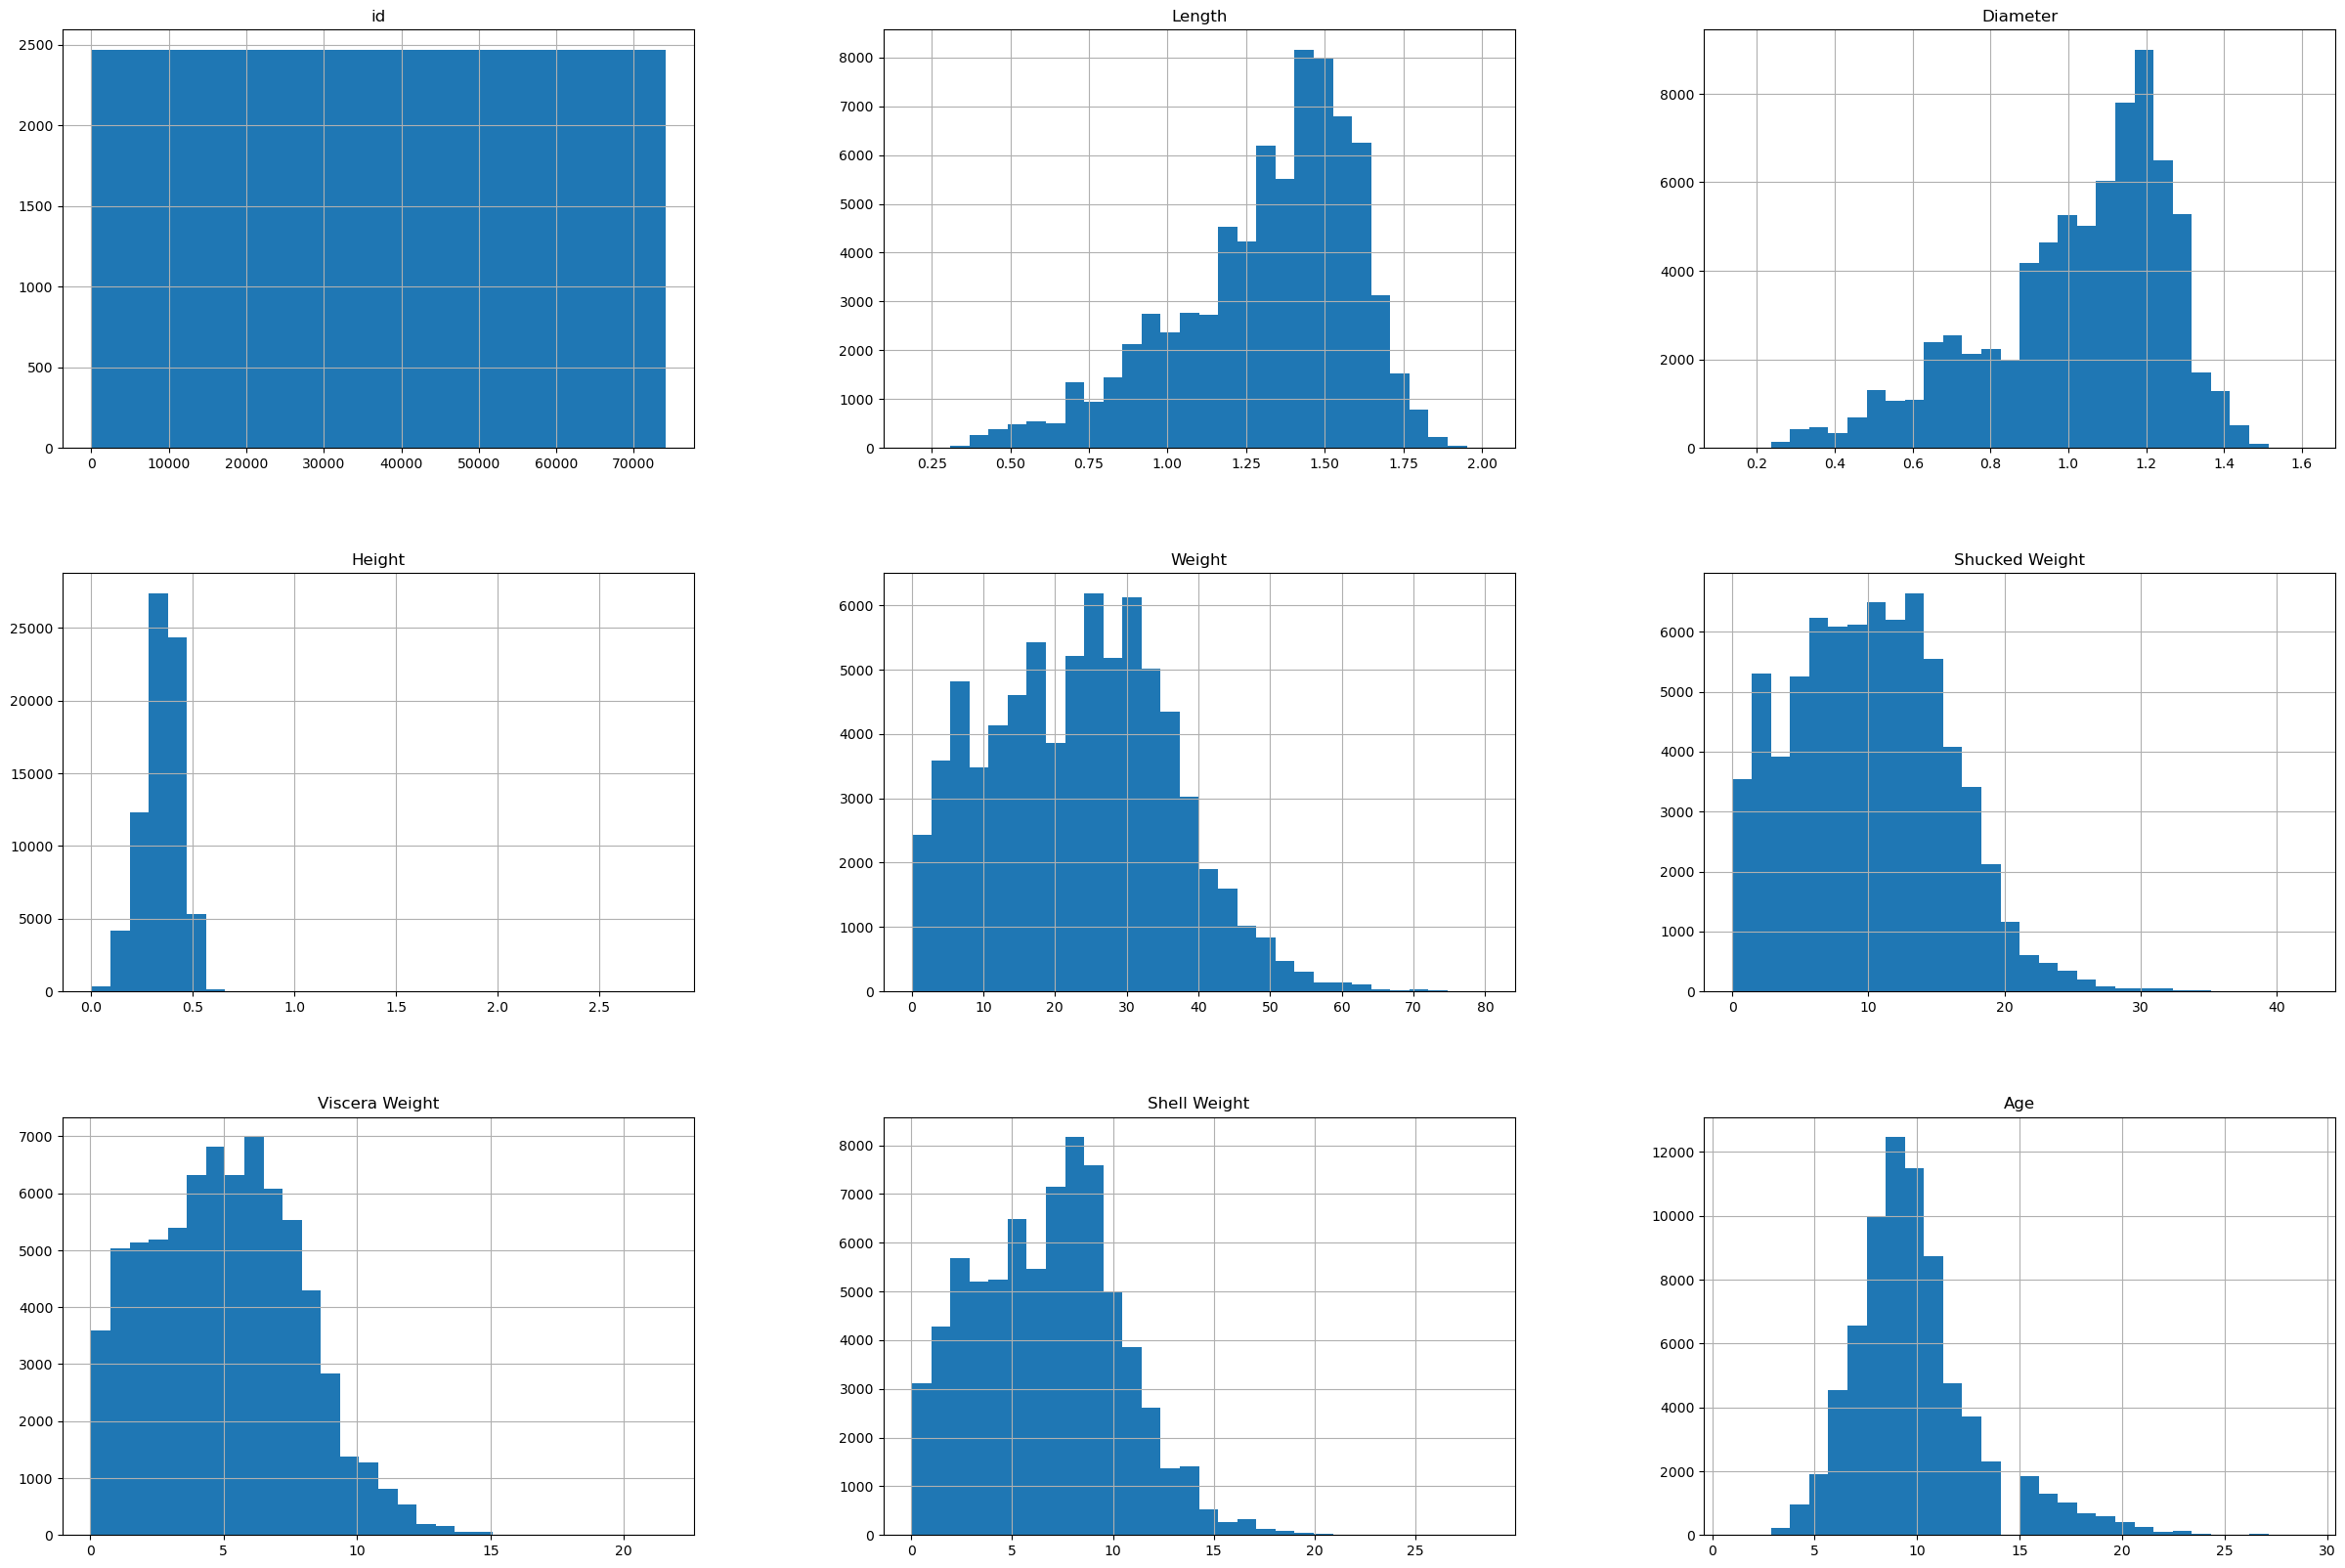

In [124]:
df_train.hist(figsize=(30, 20), bins=30)

In [125]:
corr_matrix = df_train.drop(columns=['Sex']).corr()
corr_matrix['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
id                0.000089
Name: Age, dtype: float64

In [126]:
df_train['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [127]:
df_train['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [128]:
df_test

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


## DATA PREPROCESSING

In [129]:
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df['Sex'].value_counts()

M    54168
I    47914
F    46020
Name: Sex, dtype: int64

In [130]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Sex']]).toarray()

encoded_sex = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex']))
encoded_sex

df.drop(columns=['Sex'], inplace=True)
df[df.columns.drop('id')] = scaler.fit_transform(df[df.columns.drop('id')])
df = pd.concat([df, encoded_sex], axis=1)
df

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,-0.304805,0.0,1.0,0.0
1,1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,-0.619749,0.0,1.0,0.0
2,2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,-0.304805,0.0,0.0,1.0
3,3,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,0.325083,1.0,0.0,0.0
4,4,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,-0.619749,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148097,74046,1.199075,1.002567,0.971501,2.156483,1.882648,1.899000,1.564626,0.010139,1.0,0.0,0.0
148098,74047,-0.842591,-0.682391,-0.794163,-1.022957,-1.029011,-0.989031,-0.887242,-1.249637,0.0,1.0,0.0
148099,74048,0.590919,0.739292,0.699861,0.482150,0.391495,0.888951,0.378238,0.010139,1.0,0.0,0.0
148100,74049,-0.364754,-0.261152,-0.386702,-0.523122,-0.201434,-0.765703,-0.681601,-0.619749,0.0,1.0,0.0


In [131]:
df_train = df.iloc[:74051, :]
df_test = df.iloc[74051:, :]
df_train.set_index('id', inplace=True)
df_test.set_index('id', inplace=True)

In [133]:
df_train

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,-0.304805,0.0,1.0,0.0
1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,-0.619749,0.0,1.0,0.0
2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,-0.304805,0.0,0.0,1.0
3,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,0.325083,1.0,0.0,0.0
4,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,-0.619749,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
74046,1.199075,1.002567,0.971501,2.156483,1.882648,1.899000,1.564626,0.010139,1.0,0.0,0.0
74047,-0.842591,-0.682391,-0.794163,-1.022957,-1.029011,-0.989031,-0.887242,-1.249637,0.0,1.0,0.0
74048,0.590919,0.739292,0.699861,0.482150,0.391495,0.888951,0.378238,0.010139,1.0,0.0,0.0


In [134]:
df_test

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,-0.304805,0.0,1.0,0.0
1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,-0.619749,0.0,1.0,0.0
2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,-0.304805,0.0,0.0,1.0
3,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,0.325083,1.0,0.0,0.0
4,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,-0.619749,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
74046,1.199075,1.002567,0.971501,2.156483,1.882648,1.899000,1.564626,0.010139,1.0,0.0,0.0
74047,-0.842591,-0.682391,-0.794163,-1.022957,-1.029011,-0.989031,-0.887242,-1.249637,0.0,1.0,0.0
74048,0.590919,0.739292,0.699861,0.482150,0.391495,0.888951,0.378238,0.010139,1.0,0.0,0.0
